In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tarfile
import math

from tensorflow import keras
from keras import models
from keras import layers
from keras.callbacks import EarlyStopping


from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

In [2]:
from keras.callbacks import ReduceLROnPlateau

In [3]:
from keras.layers import AlphaDropout

In [4]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [5]:
from numpy.random import seed
seed(15)

from tensorflow.random import set_seed
set_seed(15)

In [11]:
manhattan_csv = '/content/drive/MyDrive/Boro_DFs/manhatt_df.csv'

In [12]:
manhattan_df = pd.DataFrame(pd.read_csv(manhattan_csv))

In [13]:
manhattan_df.head()

,Borough,Area,Address,Num_Beds,Num_Baths,Sq-Ft,Rent,Long,Lat,ZipCode,Precinct,CrimeTotalPastYear,Train_Line,Dist_To_Line,Dist_To_Station,Dist_To_Entrance
0,manhattan,Chelsea,130 W 15th Street,2.0,2.0,1377.37,9150.0,-73.997478,40.738415,10011,13.0,1549.0,L,0.001283,0.000726,0.000919
1,manhattan,Murray Hill,401 East 34th Street,2.0,2.0,1085.00,6276.0,-73.972708,40.743649,10016,13.0,1549.0,7,0.008466,0.008466,0.007582
2,manhattan,Washington Heights,432 West 163rd Street,2.0,1.0,855.99,2646.0,-73.938373,40.836002,10032,33.0,1126.0,A-C,0.001519,0.001519,0.001446
3,manhattan,South Harlem,207 West 121st Street,0.5,1.0,537.89,1950.0,-73.950435,40.806607,10027,28.0,1017.0,B-D,0.002599,0.004581,0.004434
4,manhattan,upper east side-carnegie hill,420 E 54th Street,1.0,2.0,851.00,5869.0,-73.963335,40.755807,10022,18.0,1926.0,E,0.001128,0.005973,0.006087


In [14]:
y = manhattan_df[['Rent']]

In [15]:
X = manhattan_df.drop(['Area', 'Address','Borough', 'Rent', 'ZipCode', 'Precinct', 'CrimeTotalPastYear', 'Train_Line', 'Dist_To_Line', 'Dist_To_Station', 'Dist_To_Entrance'], axis=1)
X.head()

,Num_Beds,Num_Baths,Sq-Ft,Long,Lat
0,2.0,2.0,1377.37,-73.997478,40.738415
1,2.0,2.0,1085.00,-73.972708,40.743649
2,2.0,1.0,855.99,-73.938373,40.836002
3,0.5,1.0,537.89,-73.950435,40.806607
4,1.0,2.0,851.00,-73.963335,40.755807


In [ ]:
# X = pd.get_dummies(X, columns=['Area', 'Address', 'ZipCode', 'Precinct', 'Train_Line'])

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

In [ ]:
# numeric_cols = ['Num_Beds', 'Num_Baths', 'Sq-Ft', 'Long', 'Lat', 'CrimeTotalPastYear', 'Dist_To_Line', 'Dist_To_Station', 'Dist_To_Entrance']

In [ ]:
# X_train_num = X_train[numeric_cols]

In [ ]:
# X_test_num = X_test[numeric_cols]

In [17]:
# print(X_train_num.shape)
# print(X_test_num.shape)

In [18]:
scaler = MinMaxScaler()

In [19]:
X_train = scaler.fit_transform(X_train)

In [20]:
X_train.shape

(6914, 5)

In [21]:
X_test = scaler.transform(X_test)

In [22]:
X_test.shape

(1729, 5)

In [23]:
# X_train_onehots = X_train.drop(numeric_cols, axis=1)
# X_test_onehots = X_test.drop(numeric_cols, axis=1)

In [24]:
# X_train_onehots.shape

In [25]:
# X_test_onehots.shape

In [26]:
# X_train = np.concatenate((X_train_num, X_train_onehots), axis=1)

In [27]:
# X_test = np.concatenate((X_test_num, X_test_onehots), axis=1)

In [28]:
# create validation set
num_val_insts = math.floor(X_train.shape[0]*(.10))

X_val = X_train[:num_val_insts]
y_val = y_train[:num_val_insts]

X_train = X_train[num_val_insts:]
y_train = y_train[num_val_insts:]

In [29]:
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_val shape: {X_val.shape}, y_val shape: {y_val.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

X_train shape: (6223, 5), y_train shape: (6223, 1)
X_val shape: (691, 5), y_val shape: (691, 1)
X_test shape: (1729, 5), y_test shape: (1729, 1)


In [30]:
from keras.initializers import lecun_normal

In [31]:
initialiser = lecun_normal(seed=31)

In [32]:
# model

model = models.Sequential()
model.add(layers.Dense(512, activation='selu', input_shape=(X_train.shape[1],), kernel_initializer=initialiser))
model.add(layers.Dense(512, activation='selu', kernel_initializer=initialiser))
model.add(layers.Dense(512, activation='selu', kernel_initializer=initialiser))
model.add(layers.Dense(512, activation='selu', kernel_initializer=initialiser))
model.add(layers.Dense(512, activation='selu', kernel_initializer=initialiser))
model.add(layers.Dense(512, activation='selu', kernel_initializer=initialiser))
model.add(layers.Dense(512, activation='selu', kernel_initializer=initialiser))

model.add(layers.Dense(256, activation='selu', kernel_initializer=initialiser))
model.add(layers.Dense(256, activation='selu', kernel_initializer=initialiser))

model.add(layers.Dense(128, activation='selu', kernel_initializer=initialiser))
model.add(layers.Dense(128, activation='selu', kernel_initializer=initialiser))

model.add(layers.Dense(64, activation='selu', kernel_initializer=initialiser))
model.add(layers.Dense(64, activation='selu', kernel_initializer=initialiser))


model.add(layers.Dense(1))

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               3072      
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 512)               262656    
                                                                 
 dense_3 (Dense)             (None, 512)               262656    
                                                                 
 dense_4 (Dense)             (None, 512)               262656    
                                                                 
 dense_5 (Dense)             (None, 512)               262656    
                                                                 
 dense_6 (Dense)             (None, 512)               2

In [34]:
model.compile(loss="huber_loss", optimizer=keras.optimizers.Adam(learning_rate=.001), metrics=["mae"])

In [35]:
early_stop = EarlyStopping(monitor='val_mae', mode='min', 
                           verbose=1, patience=30, min_delta=.5, 
                           restore_best_weights=True)

In [36]:
#reduce on plateau
reduce_lr = ReduceLROnPlateau(
    monitor='val_mae',
    patience=15,
    factor=.1,
    mode='min',
    min_delta=.5,
    verbose=1,
    min_lr=.0001
)

In [37]:
history = model.fit(X_train, y_train, epochs=500,
                    validation_data=(X_val, y_val),
                    callbacks=[early_stop, reduce_lr])

Epoch 1/500
195/195 [==============================] - 5s 6ms/step - loss: 2285.7646 - mae: 2286.2644 - val_loss: 1454.4338 - val_mae: 1454.9338 - lr: 0.0010
Epoch 2/500
195/195 [==============================] - 1s 5ms/step - loss: 1505.3186 - mae: 1505.8186 - val_loss: 1357.7419 - val_mae: 1358.2419 - lr: 0.0010
Epoch 3/500
195/195 [==============================] - 1s 5ms/step - loss: 1522.1949 - mae: 1522.6949 - val_loss: 1342.9535 - val_mae: 1343.4535 - lr: 0.0010
Epoch 4/500
195/195 [==============================] - 1s 5ms/step - loss: 1501.0936 - mae: 1501.5936 - val_loss: 1263.6396 - val_mae: 1264.1396 - lr: 0.0010
Epoch 5/500
195/195 [==============================] - 1s 5ms/step - loss: 1341.3511 - mae: 1341.8511 - val_loss: 1277.0106 - val_mae: 1277.5106 - lr: 0.0010
Epoch 6/500
195/195 [==============================] - 1s 4ms/step - loss: 1413.1078 - mae: 1413.6075 - val_loss: 1464.3658 - val_mae: 1464.8658 - lr: 0.0010
Epoch 7/500
195/195 [==============================]

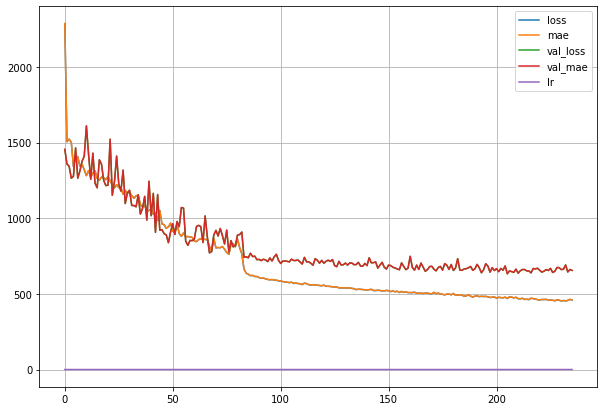

In [38]:
pd.DataFrame(history.history).plot(figsize=(10, 7))
plt.grid(True)
plt.show()

In [39]:
scores = model.evaluate(X_test, y_test)

55/55 [==============================] - 0s 4ms/step - loss: 698.3141 - mae: 698.8130


In [40]:
preds = model.predict(X_test, verbose=1)

55/55 [==============================] - 0s 2ms/step


In [41]:
from scipy import stats

In [42]:
confidence = 0.95

abs_errors = abs(preds.flatten() - y_test.to_numpy().flatten())
stats.t.interval(confidence, len(abs_errors)-1, 
                         loc=abs_errors.mean(), 
                         scale=stats.sem(abs_errors))

(604.2203690704301, 793.4058452785433)

In [44]:
# model.save("manhattan_model.h5")

In [46]:
# /content/drive/MyDrive/Boro_DFs/
model.save("/content/drive/MyDrive/Boro_DFs/manhattan_minimum_features_model.h5")